In [5]:
import os
from glob import glob
import torchaudio

In [3]:
BASE_DIR = '/root/class/cmu/LSMA/ls-hw1'
DATA_DIR = '/shared/youngkim/dataset'
os.chdir(DATA_DIR)

In [20]:
AUDIO_DIR = os.path.join(DATA_DIR, 'wav_16k')
wav_file_paths = glob(os.path.join(AUDIO_DIR, '*'))
wav_file_paths[:3]

['/shared/youngkim/dataset/wav_16k/LTg0Mjg2ODE4NzEzOTY5NjE0OTM=.wav',
 '/shared/youngkim/dataset/wav_16k/NDkxMjg3NTA2Mjg5NjMxNDI0MQ==.wav',
 '/shared/youngkim/dataset/wav_16k/LTg0MTI4MTM1MzAzOTU5NDkzNDg=.wav']

In [26]:
time_shape = []
for wav in wav_file_paths:
    waveform, _ = torchaudio.load(wav)
    time_shape.append(waveform.shape[1])

In [35]:
len(time_shape)

8245

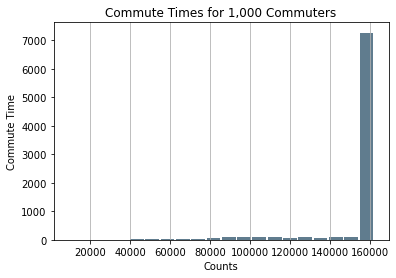

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(time_shape)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [33]:
time_shape_outlier = []
for wav in wav_file_paths:
    waveform, _ = torchaudio.load(wav)
    if waveform.shape[1] < 159753:
        time_shape_outlier.append(waveform.shape[1])
len(time_shape_outlier)

1068

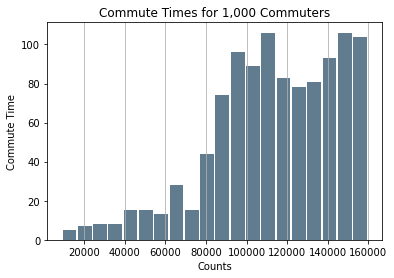

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(time_shape_outlier)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [17]:
Mel_Spectrogram = torchaudio.transforms.MelSpectrogram()(waveform)

/root/anaconda3/envs/torch18/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [18]:
Mel_Spectrogram.shape

torch.Size([1, 128, 801])